In [1]:
from pandas import Series, DataFrame
import pandas as pd
# Resetting plotting Defaults
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
fb=pd.read_csv("s3://stockmarkettest1/pseudo_facebook.csv")
fb=fb.astype({'userid': int64,
'age':int64,
'dob_day':                    int64,
'dob_year':                   int64,
'dob_month':                  int64,
'gender':                    object,
'tenure':                   float64,
'friend_count':               int64,
'friendships_initiated':      int64,
'likes':                      int64,
'likes_received':             int64,
'mobile_likes' :              int64,
'mobile_likes_received':      int64,
'www_likes':                  int64,
'www_likes_received':         int64})

In [12]:
fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [13]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [16]:
check_null=fb.isnull()

In [17]:
fb.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238B74ADE50>,
      dtype=object)

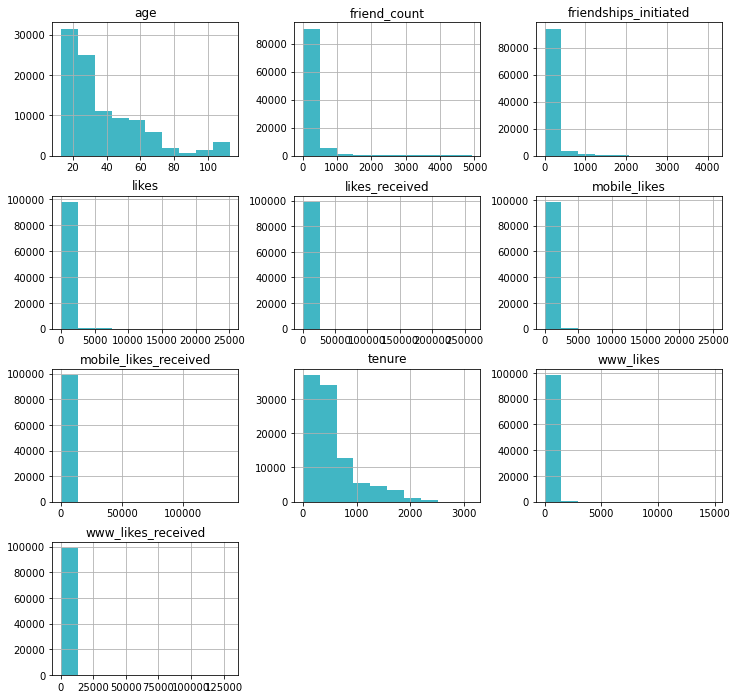

In [18]:
forhist=['age','friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes','www_likes_received','tenure']
fb_subset1=pd.DataFrame(fb[forhist])
fb_subset1.hist(figsize=(12,12), color='#41b6c4')

In [19]:
# remove outliers
def rem_out(elements):
    mean = numpy.mean(elements, axis=0)
    sd = numpy.std(elements, axis=0)
    final_list = [x for x in elements if (x > mean - 2 * sd)]
    final_list = [x for x in final_list if (x < mean + 2 * sd)]
    return final_list

In [20]:
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

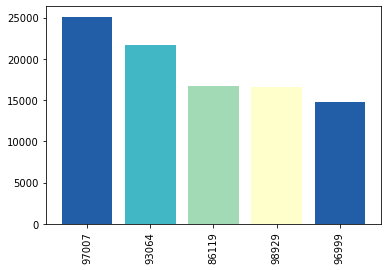

In [21]:
#mycolors=np.array(['#F8B195','#F67280','#C06C84','#6C5B7B', '#355C7D'])
mycolors=np.array(['#225ea8', '#41b6c4', '#a1dab4', '#ffffcc'])
k=fb[['userid','likes']].reset_index()
k['likes'].sort_values(ascending=False)[:5].plot(kind='bar', color=mycolors, width=0.8)

### Friend count DIstribution
For 95% observations we have friend count between 0 to 1000

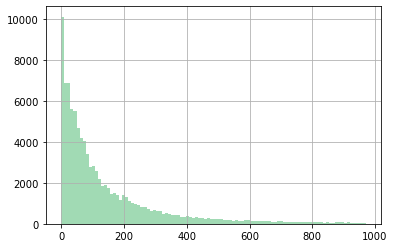

In [22]:
pd.Series(rem_out(fb_subset1['friend_count'])).hist(bins=100, color='#a1dab4')

In [23]:
# Top 5
fb[['friend_count','userid']].sort_values(by='friend_count', ascending = False)[:5].set_index('userid')

,friend_count
userid,
2090699,4923
1660276,4917
1926655,4863
1685573,4845
1386477,4844


### Likes Distribution
For 95% observations we have likes between 0 to 1200

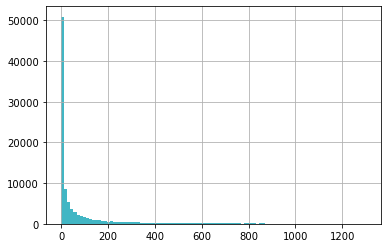

In [24]:
Generic_likes=rem_out(fb['likes'])
pd.Series(Generic_likes).hist(bins=100, color='#41b6c4')

###  Exploratory Data Analysis


In [25]:
import seaborn as sns 

In [26]:
# Remove object column in dataframe to use heatmap (Gender here)
cols=['age','tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes', 'www_likes_received']
fb_hm=fb[cols]
fb_hm=fb_hm.fillna(0)
# sns.heatmap(features.drop(['columnName01_OfTypeObject','columnName02_OfTypeObject'],axis=1)

[Text(0, 0.5, 'age'),
 Text(0, 1.5, 'tenure'),
 Text(0, 2.5, 'friend_count'),
 Text(0, 3.5, 'friendships_initiated'),
 Text(0, 4.5, 'likes'),
 Text(0, 5.5, 'likes_received'),
 Text(0, 6.5, 'mobile_likes'),
 Text(0, 7.5, 'mobile_likes_received'),
 Text(0, 8.5, 'www_likes'),
 Text(0, 9.5, 'www_likes_received')]

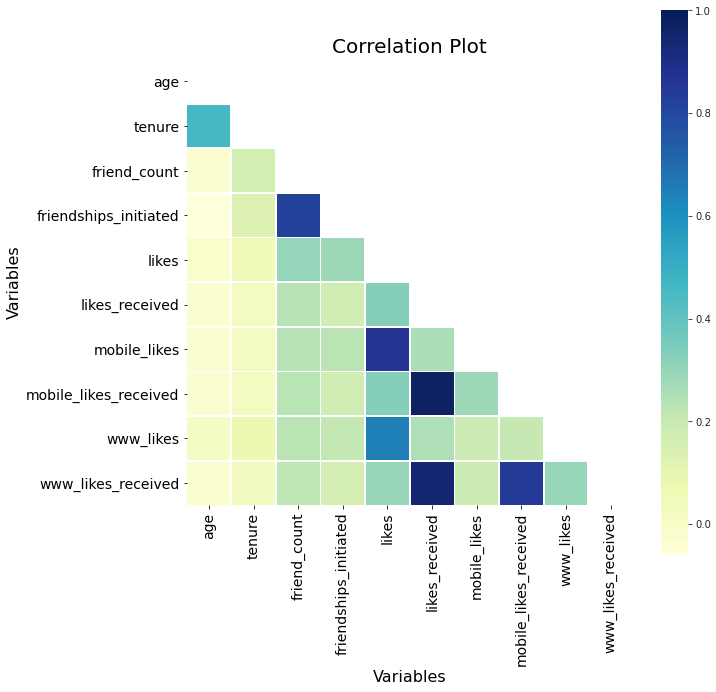

In [27]:
corr = fb_hm.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10)) 
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True,cmap="YlGnBu", linewidths=.8)
ax.set_title('Correlation Plot', size=20)
ax.set_xlabel('Variables', size=16)
ax.set_ylabel('Variables', size=16)
ax.set_xticklabels(cols,fontsize=14)
ax.set_yticklabels(cols,fontsize=14)

### Likes by Birth Year & month
As years are increasing on x-axis there are more number of likes, depicting extensive usage of facebook
Month prominence for year 1994-95, two months standout in number of likes September & March (fun observation) 

Text(114.0, 0.5, 'Months')

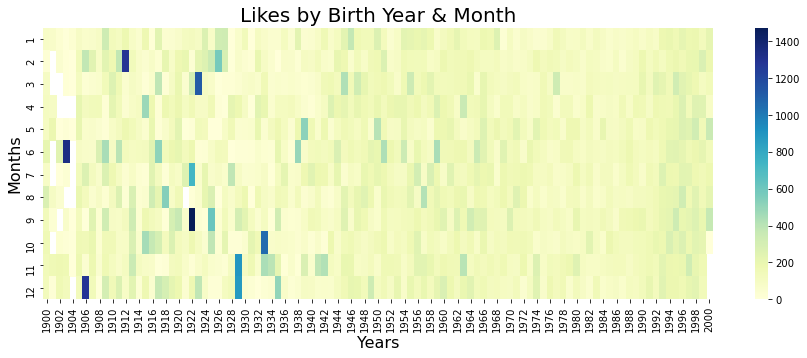

In [28]:
fb_likes = pd.pivot_table(fb,index='dob_month', columns='dob_year',values= 'likes', aggfunc='mean')
fig, ax = plt.subplots(figsize=(15,5)) 
x = sns.heatmap(fb_likes, cmap="YlGnBu", ax=ax)
ax.set_title('Likes by Birth Year & Month', size=20)
ax.set_xlabel('Years', size=16)
ax.set_ylabel('Months', size=16)

Text(114.0, 0.5, 'Months')

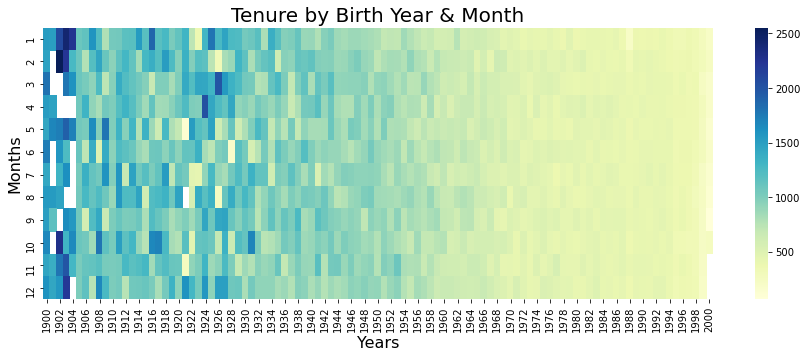

In [29]:
fb_likes = pd.pivot_table(fb,index='dob_month', columns='dob_year',values= 'tenure', aggfunc='mean')
fig, ax = plt.subplots(figsize=(15,5)) 
x = sns.heatmap(fb_likes, cmap="YlGnBu", ax=ax)
ax.set_title('Tenure by Birth Year & Month', size=20)
ax.set_xlabel('Years', size=16)
ax.set_ylabel('Months', size=16)

#### Likes received (depicting popularity)

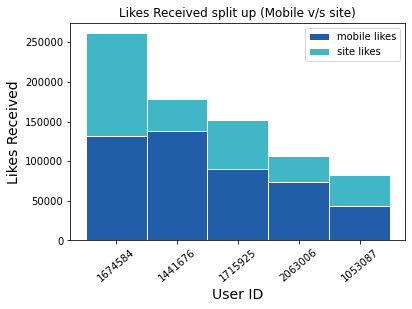

In [30]:
#'#F8B195','#F67280','#C06C84','#6C5B7B', '#355C7D'
# '#225ea8', '#41b6c4', '#a1dab4', '#ffffcc'
# libraries
import matplotlib.pyplot as plt
fb_toplikes_received=fb.sort_values(by='likes_received', ascending=False)[:5]
    
# Values of each group
bars1 = fb_toplikes_received['mobile_likes_received']
bars2 = fb_toplikes_received['www_likes_received']

# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = fb_toplikes_received['userid']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#225ea8', edgecolor='white', width=barWidth, label='mobile likes')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#41b6c4', edgecolor='white', width=barWidth, label='site likes')
 
# Custom X axis
plt.xticks(r, names, rotation =40)
plt.xlabel("User ID", size = 14)
plt.ylabel("Likes Received", size = 14)
plt.title("Likes Received split up (Mobile v/s site)")
plt.legend(loc='best')
 
# Show graphic
plt.show()

#### Likes given (depicting individual preference)

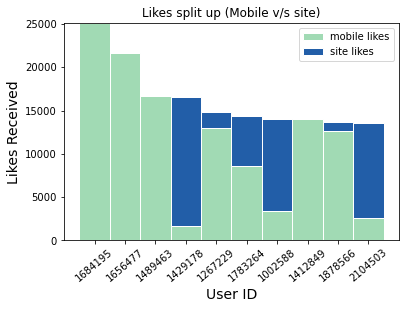

In [31]:
# libraries
import matplotlib.pyplot as plt
fb_toplikes=fb.sort_values(by='likes', ascending=False)[:10]
    
# Values of each group
bars1 = fb_toplikes['mobile_likes']
bars2 = fb_toplikes['www_likes']

# The position of the bars on the x-axis
r = range(10)
 
# Names of group and bar width
names = fb_toplikes['userid']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#a1dab4', edgecolor='white', width=barWidth, label='mobile likes')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#225ea8', edgecolor='white', width=barWidth, label='site likes')
 
# Custom X axis
plt.xticks(r, names, rotation =40)
plt.xlabel("User ID", size = 14)
plt.ylabel("Likes Received", size = 14)
plt.title("Likes split up (Mobile v/s site)")
plt.legend(loc='best')
 
# Show graphic
plt.show()

# Gender Preference
Friends Counts & Friendships initiated

In [32]:
fb_gender=fb.fillna("NA")
fb_gender_pivot=fb_gender.pivot_table(index='gender', values=['likes','likes_received'],aggfunc='mean')

In [33]:
fb['gender'].value_counts()

male      58574
female    40254
Name: gender, dtype: int64

In [34]:
fb_gender_pivot

,likes,likes_received
gender,,
NA,138.508571,157.382857
female,260.051324,251.435435
male,84.677895,67.911548


In [35]:
# Drop NA as it is very minute
mask_g=fb_gender_pivot.index.values!='NA'
fb_gender_pivot=fb_gender_pivot[mask_g]

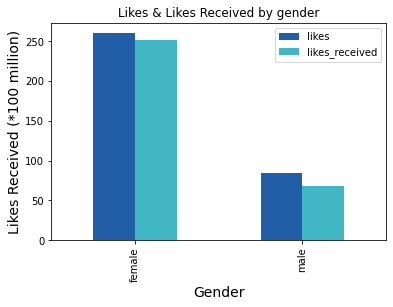

In [36]:
fb_gender_pivot.plot(kind='bar',color=mycolors)
plt.xticks(size=10)
plt.xlabel("Gender", size = 14)
plt.ylabel("Likes Received (*100 million)", size = 14)
plt.title("Likes & Likes Received by gender")
plt.legend(loc='best')

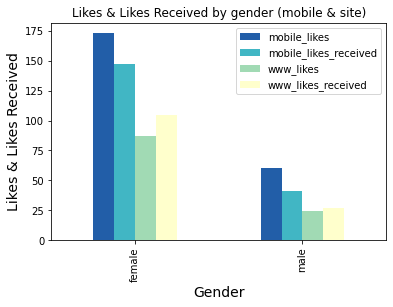

In [37]:
fb_gender=fb.fillna("NA")
fb_gender_pivot=fb_gender.pivot_table(index='gender', values=['mobile_likes', 'mobile_likes_received',
       'www_likes','www_likes_received'],aggfunc='mean')
# Drop NA as it is very minute
mask_g=fb_gender_pivot.index.values!='NA'
fb_gender_pivot=fb_gender_pivot[mask_g]
fb_gender_pivot.plot(kind='bar',color=mycolors)
plt.xticks(size=10)
plt.xlabel("Gender", size = 14)
plt.ylabel("Likes & Likes Received", size = 14)
plt.title("Likes & Likes Received by gender (mobile & site)")
plt.legend(loc='best')

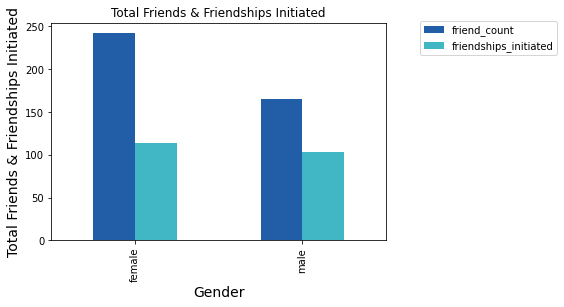

In [38]:
fb_gender=fb.fillna("NA")
fb_gender_pivot=fb_gender.pivot_table(index='gender', values=['friend_count', 'friendships_initiated'],aggfunc='mean')
# Drop NA as it is very minute
mask_g=fb_gender_pivot.index.values!='NA'
fb_gender_pivot=fb_gender_pivot[mask_g]
fb_gender_pivot.plot(kind='bar',color=mycolors)
plt.xticks(size=10)
plt.xlabel("Gender", size = 14)
plt.ylabel("Total Friends & Friendships Initiated", size = 14)
plt.title("Total Friends & Friendships Initiated")
plt.legend(loc=(1.1,.85))

### Users w.r.t birth year
We see bumps between 1940 to 1980. After 1980 the no. users rocket. Since the data is till 2000 (we see miniscule value in 2000)

In [39]:
fb_yearwise=fb[['dob_year','userid']].drop_duplicates().sort_values(by='dob_year')


In [40]:
fb_yearwise=fb_yearwise.reset_index()
fb_yearwise.head(2)

,index,dob_year,userid
0,45453,1900,1708305
1,55697,1900,1591019


In [41]:
fb_yearwise=fb_yearwise.groupby(['dob_year'])[['userid']].agg('count')
fb_yearwise.columns=['No. of Users']

Text(0.5, 1.0, 'Total no. of Users w.r.t birth year')

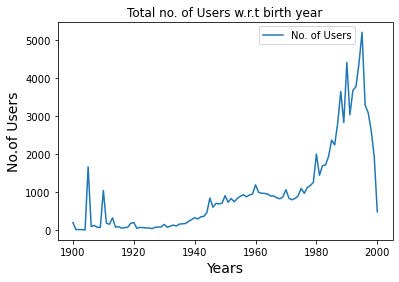

In [42]:
fb_yearwise.plot(kind='line')
plt.legend(loc=(0.60,0.9))
plt.xlabel("Years", size = 14)
plt.ylabel("No.of Users", size = 14)
plt.title("Total no. of Users w.r.t birth year")

Text(0.5, 1.0, 'Age wise distribution of Users')

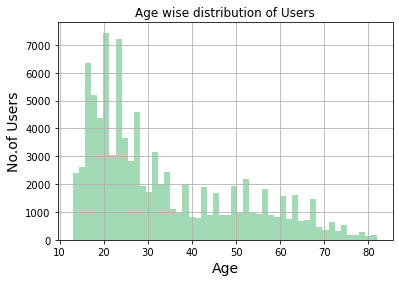

In [43]:
age=pd.Series(rem_out(fb['age']))
age.hist(bins=50, color='#a1dab4')
plt.xlabel("Age", size = 14)
plt.ylabel("No.of Users", size = 14)
plt.title("Age wise distribution of Users")

# Modelling 

In [44]:
model_columns=['age', 'dob_day', 'dob_year', 'dob_month', 'gender',
       'tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received']
fb_model=fb.dropna()

In [45]:
categorical_columns = ['gender']
f=['age',
       'tenure', 'friend_count', 'friendships_initiated',
       'likes_received']
formula = '{}'.format(' + '.join(['C({})'.format(x) for x in categorical_columns]))
m = 'likes ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in f]))

In [46]:
n=m+'+'+formula
n

'likes ~ 0 + Q("age") + Q("tenure") + Q("friend_count") + Q("friendships_initiated") + Q("likes_received")+C(gender)'

In [51]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices(n, data=fb_model, return_type='dataframe')

In [59]:
##########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = sm.OLS(y_train, X_train)       # Set up the model
result = model.fit()     # Fit model (find the intercept and slopes)
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2867.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:40:08   Log-Likelihood:            -5.2665e+05
No. Observations:               69178   AIC:                         1.053e+06
Df Residuals:                   69171   BIC:                         1.053e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(gender)[female]            144.1977      4.661     30.935      0.000     135.061     153.334
C(gender)[male]                8.8286      4.057      2.176      0.030       0.878      16.779
Q("age")                      -0.1658      0.094     -1.762      0.078      -0.350       0.019
Q("tenure")                    0.0091      0.005      1.947      0.051   -5.95e-05       0.018
Q("friend_count")              0.1037      0.009     11.960      0.000       0.087       0.121
Q("friendships_initiated")     0.4793      0.018     27.312      0.000       0.445       0.514
Q("likes_received")            0.1388      0.002     84.549      0.000       0.136       0.142
==============================================================================
Omnibus:                    89844.487   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        185779230.061
Skew:                           6.384   Prob(JB):                         0.00
Kurtosis:                     256.554   Cond. No.                     3.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
from sklearn import metrics
prediction = pd.DataFrame(model.fit().predict(X_test))

In [61]:
Results=y_test.merge(prediction, left_index=True, right_index=True)


In [62]:
MAPE = sqrt(mean(abs(Results[0]-Results['likes'])**2))

In [63]:
Results=Results.reset_index()[['likes',0]]
Results.columns=['Actual','Predicted']

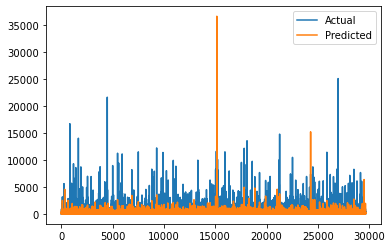

In [64]:
Results.plot(kind='line')